# Gradient Descent for Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

### Define Training Data for Logistic Regression
In this section, training data for a logistic regression problem is defined. The input features are stored in the array `X_train_logistic`, and the corresponding binary output labels (0 or 1) are stored in the array `y_train_logistic`.

In [2]:
# Define training data for logistic regression
X_train_logistic = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train_logistic = np.array([0, 0, 0, 1, 1, 1])

### Sigmoid Activation Function
The function `sigmoid_function` implements the sigmoid activation function. It takes an input value (`z`) and returns the output of the sigmoid function (`g`).

In [3]:
def sigmoid_function(z):
    """
    Sigmoid activation function.

    Parameters:
    - z: Input value.

    Returns:
    - g: Output of the sigmoid function.
    """
    g = 1 / (1 + np.exp(-z))
    return g


### Logistic Regression Cost Computation
The function `compute_cost_logistic` computes the logistic regression cost using the sigmoid activation function. It takes input features matrix (`X`), binary output labels (`y`), weight, and bias as parameters and returns the computed logistic regression cost.

In [4]:
def compute_cost_logistic(X, y, weight, bias):
    """
    Compute the logistic regression cost using the sigmoid activation function.

    Parameters:
    - X: Input features matrix as a NumPy array.
    - y: Binary output labels (0 or 1) as a NumPy array.
    - weight: Weight parameter of the logistic regression model.
    - bias: Bias parameter of the logistic regression model.

    Returns:
    - cost: Logistic regression cost.
    """
    m = X.shape[0]
    cost = 0.0

    # Calculate the logistic regression cost using sigmoid activation
    for i in range(m):
        z_i = np.dot(X[i], weight) + bias
        f_wb_i = sigmoid_function(z_i)
        cost += (-y[i] * np.log(f_wb_i)) - ((1 - y[i]) * np.log(1 - f_wb_i))

    cost *= (1 / m)
    return cost

### Gradient Computation for Logistic Regression
The function `compute_gradient_logistic` computes the gradient of the logistic regression cost function. It takes input features matrix (`X`), binary output labels (`y`), weight, and bias as parameters and returns the partial derivatives of the cost with respect to bias (`dj_db`) and weights (`dj_dw`).

<p align="center">
    <img src="4_gradient_log.png" alt="Linear Regression Cost" />
</p>

In [5]:
def compute_gradient_logistic(X, y, weight, bias):
    """
    Compute the gradient of the logistic regression cost function.

    Parameters:
    - X: Input features matrix as a NumPy array.
    - y: Binary output labels (0 or 1) as a NumPy array.
    - weight: Weight parameter of the logistic regression model.
    - bias: Bias parameter of the logistic regression model.

    Returns:
    - dj_db: Partial derivative of the cost with respect to the bias.
    - dj_dw: Partial derivatives of the cost with respect to the weights.
    """
    m, n = X.shape
    dj_dw = np.zeros((n))
    dj_db = 0.0

    # Calculate partial derivatives using sigmoid activation
    for i in range(m):
        f_wb_i = sigmoid_function(np.dot(X[i], weight) + bias)
        err_i = f_wb_i - y[i]

        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i, j]
        dj_db = dj_db + err_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

### Example Computation of Gradient for Logistic Regression
The code demonstrates an example computation of the gradient for logistic regression using the function `compute_gradient_logistic`. The input features (`X_tmp_example`), binary output labels (`y_tmp_example`), weight (`w_tmp_example`), and bias (`b_tmp_example`) are used for the calculation. The computed partial derivatives of the cost with respect to bias (`dj_db_tmp_example`) and weights (`dj_dw_tmp_example`) are displayed.

In [6]:
# Example computation of gradient for logistic regression
X_tmp_example = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp_example = np.array([0, 0, 0, 1, 1, 1])
w_tmp_example = np.array([2.0, 3.0])
b_tmp_example = 1.0
dj_db_tmp_example, dj_dw_tmp_example = compute_gradient_logistic(X_tmp_example, y_tmp_example, w_tmp_example, b_tmp_example)

# Display computed gradients
print(f"Partial derivative of cost with respect to bias (dj_db): {dj_db_tmp_example}")
print(f"Partial derivatives of cost with respect to weights (dj_dw): {dj_dw_tmp_example.tolist()}")

Partial derivative of cost with respect to bias (dj_db): 0.49861806546328574
Partial derivatives of cost with respect to weights (dj_dw): [0.498333393278696, 0.49883942983996693]


### Logistic Regression Gradient Descent Optimization
The function `logistic_regression_gradient_descent` performs gradient descent optimization for logistic regression. It takes input features matrix (`X`), binary output labels (`y`), initial weights (`initial_weights`), initial bias (`initial_bias`), learning rate (`learning_rate`), and the number of iterations (`num_iterations`) as parameters. The final weights (`final_weights`), final bias (`final_bias`), and a list containing the cost at each iteration (`cost_history`) are returned.

<p align="center">
    <img src="5_weight_updation_log.png" alt="Linear Regression Cost" />
</p>

In [7]:
def logistic_regression_gradient_descent(X, y, initial_weights, initial_bias, learning_rate, num_iterations):
    """
    Perform gradient descent optimization for logistic regression.

    Parameters:
    - X: Input features matrix as a NumPy array.
    - y: Binary output labels (0 or 1) as a NumPy array.
    - initial_weights: Initial weights for the logistic regression model.
    - initial_bias: Initial bias for the logistic regression model.
    - learning_rate: Learning rate.
    - num_iterations: Number of iterations for gradient descent.

    Returns:
    - final_weights: Final weights after gradient descent.
    - final_bias: Final bias after gradient descent.
    - cost_history: List containing the cost at each iteration.
    """
    cost_history = []
    weights = copy.deepcopy(initial_weights)
    bias = initial_bias

    for i in range(num_iterations):
        partial_bias, partial_weights = compute_gradient_logistic(X, y, weights, bias)

        weights = weights - (learning_rate * partial_weights)
        bias = bias - (learning_rate * partial_bias)

        cost_history.append(compute_cost_logistic(X, y, weights, bias))

        if i % 1000 == 0:
            print(f"Iteration: {i}, Cost: {cost_history[-1]}")

    return weights, bias, cost_history

### Example Usage of Logistic Regression Gradient Descent
The code demonstrates an example usage of the `logistic_regression_gradient_descent` function for logistic regression. Initial weights (`initial_weights_tmp`), initial bias (`initial_bias_tmp`), learning rate (`learning_rate_tmp`), and the number of iterations (`num_iterations_tmp`) are specified. The final weights (`final_weights_tmp`), final bias (`final_bias_tmp`), and a list containing the cost at each iteration (`cost_history_tmp`) are printed.

In [8]:
# Example usage of logistic_regression_gradient_descent
initial_weights_tmp = np.zeros_like(X_train_logistic[0])
initial_bias_tmp = 0.0
learning_rate_tmp = 0.1
num_iterations_tmp = 10000

final_weights_tmp, final_bias_tmp, cost_history_tmp = logistic_regression_gradient_descent(X_train_logistic, y_train_logistic, initial_weights_tmp, initial_bias_tmp, learning_rate_tmp, num_iterations_tmp)
print(f"\nUpdated parameters: w:{final_weights_tmp}, b:{final_bias_tmp}")

Iteration: 0, Cost: 0.6846104685605738
Iteration: 1000, Cost: 0.1590977666870456
Iteration: 2000, Cost: 0.0846006417693008
Iteration: 3000, Cost: 0.05705327279402531
Iteration: 4000, Cost: 0.04290759421682007
Iteration: 5000, Cost: 0.034338477298845684
Iteration: 6000, Cost: 0.028603798022120097
Iteration: 7000, Cost: 0.024501569608792996
Iteration: 8000, Cost: 0.02142370332569295
Iteration: 9000, Cost: 0.019030137124109114

Updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


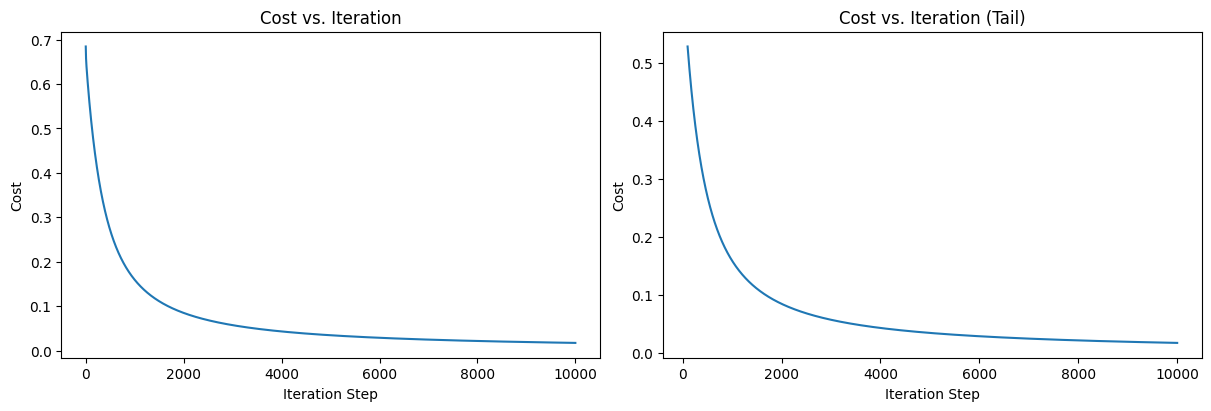

In [9]:
# Plotting cost versus iteration for logistic regression
fig, (subplot1, subplot2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
subplot1.plot(cost_history_tmp)
subplot2.plot(100 + np.arange(len(cost_history_tmp[100:])), cost_history_tmp[100:])
subplot1.set_title("Cost vs. Iteration")
subplot2.set_title("Cost vs. Iteration (Tail)")
subplot1.set_ylabel('Cost')
subplot2.set_ylabel('Cost')
subplot1.set_xlabel('Iteration Step')
subplot2.set_xlabel('Iteration Step')
plt.show()